# Accident Severity Prediction Model

This Jupyter Notebook will be used to document the Accident Severity Prediction model for Seattle Road Data

In [81]:
import types
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
# List of Column Names to Determine what to select to keep or change
list(df_accident.columns) 

['SEVERITYCODE',
 'X',
 'Y',
 'OBJECTID',
 'INCKEY',
 'COLDETKEY',
 'REPORTNO',
 'STATUS',
 'ADDRTYPE',
 'INTKEY',
 'LOCATION',
 'EXCEPTRSNCODE',
 'EXCEPTRSNDESC',
 'SEVERITYCODE.1',
 'SEVERITYDESC',
 'COLLISIONTYPE',
 'PERSONCOUNT',
 'PEDCOUNT',
 'PEDCYLCOUNT',
 'VEHCOUNT',
 'INCDATE',
 'INCDTTM',
 'JUNCTIONTYPE',
 'SDOT_COLCODE',
 'SDOT_COLDESC',
 'INATTENTIONIND',
 'UNDERINFL',
 'WEATHER',
 'ROADCOND',
 'LIGHTCOND',
 'PEDROWNOTGRNT',
 'SDOTCOLNUM',
 'SPEEDING',
 'ST_COLCODE',
 'ST_COLDESC',
 'SEGLANEKEY',
 'CROSSWALKKEY',
 'HITPARKEDCAR']

In [5]:
df = df_accident.rename(str.lower, axis='columns')
df = df.rename(columns={"x": "longitude", "y": "latitude"})

# Create a new Dataframe with only the data we are interested in for this project
df_a = df[['severitycode',
 'latitude', 'longitude',
 'personcount',
 'pedcount',
 'pedcylcount',
 'vehcount',
 'incdttm','addrtype','junctiontype','severitydesc',
 'collisiontype','weather',
 'roadcond',
 'lightcond',]].copy()

df_a.head()

,severitycode,latitude,longitude,personcount,pedcount,pedcylcount,vehcount,incdttm,addrtype,junctiontype,severitydesc,collisiontype,weather,roadcond,lightcond
0,2,47.703140,-122.323148,2,0,0,2,3/27/2013 2:54:00 PM,Intersection,At Intersection (intersection related),Injury Collision,Angles,Overcast,Wet,Daylight
1,1,47.647172,-122.347294,2,0,0,2,12/20/2006 6:55:00 PM,Block,Mid-Block (not related to intersection),Property Damage Only Collision,Sideswipe,Raining,Wet,Dark - Street Lights On
2,1,47.607871,-122.334540,4,0,0,3,11/18/2004 10:20:00 AM,Block,Mid-Block (not related to intersection),Property Damage Only Collision,Parked Car,Overcast,Dry,Daylight
3,1,47.604803,-122.334803,3,0,0,3,3/29/2013 9:26:00 AM,Block,Mid-Block (not related to intersection),Property Damage Only Collision,Other,Clear,Dry,Daylight
4,2,47.545739,-122.306426,2,0,0,2,1/28/2004 8:04:00 AM,Intersection,At Intersection (intersection related),Injury Collision,Angles,Raining,Wet,Daylight


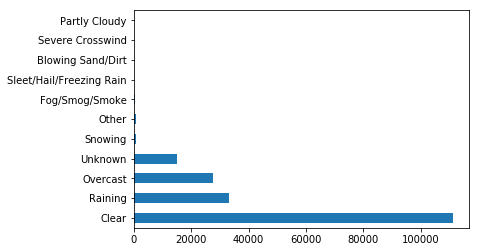

In [6]:
df_a['weather'].value_counts()[:20].plot(kind='barh')

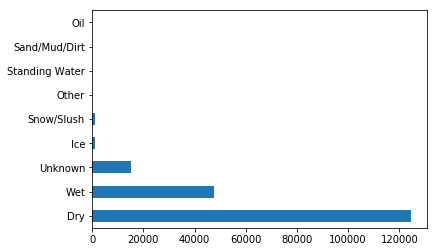

In [7]:
df_a['roadcond'].value_counts()[:20].plot(kind='barh')

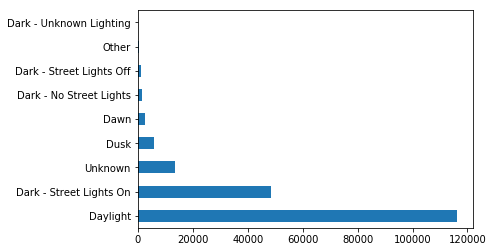

In [8]:
df_a['lightcond'].value_counts()[:20].plot(kind='barh')

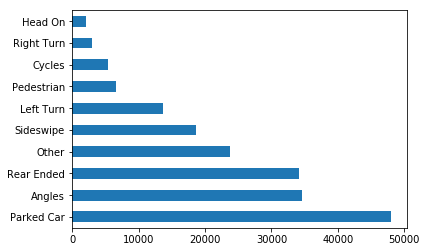

In [9]:
df_a['collisiontype'].value_counts()[:20].plot(kind='barh')

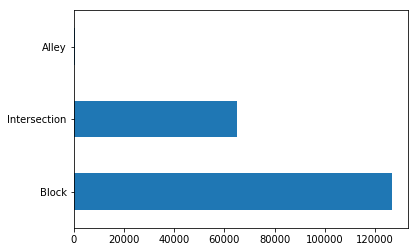

In [10]:
df_a['addrtype'].value_counts()[:20].plot(kind='barh')

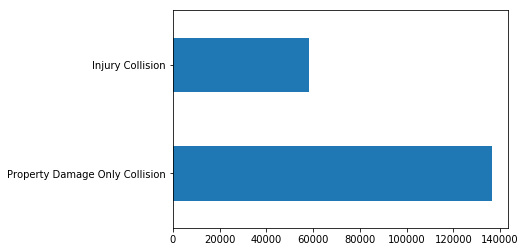

In [11]:
df_a['severitydesc'].value_counts()[:20].plot(kind='barh')

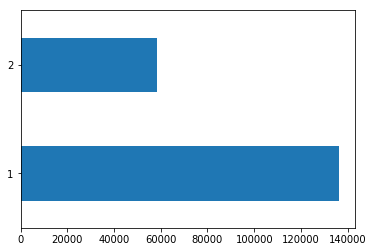

In [12]:
df_a['severitycode'].value_counts()[:20].plot(kind='barh')

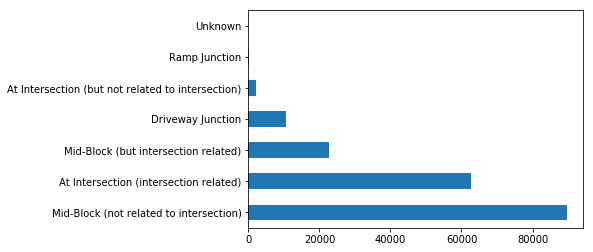

In [13]:
df_a['junctiontype'].value_counts()[:20].plot(kind='barh')

In [14]:
df_a['incdttm'] = pd.to_datetime(df_a['incdttm'])
df_a.head()

,severitycode,latitude,longitude,personcount,pedcount,pedcylcount,vehcount,incdttm,addrtype,junctiontype,severitydesc,collisiontype,weather,roadcond,lightcond
0,2,47.703140,-122.323148,2,0,0,2,2013-03-27 14:54:00,Intersection,At Intersection (intersection related),Injury Collision,Angles,Overcast,Wet,Daylight
1,1,47.647172,-122.347294,2,0,0,2,2006-12-20 18:55:00,Block,Mid-Block (not related to intersection),Property Damage Only Collision,Sideswipe,Raining,Wet,Dark - Street Lights On
2,1,47.607871,-122.334540,4,0,0,3,2004-11-18 10:20:00,Block,Mid-Block (not related to intersection),Property Damage Only Collision,Parked Car,Overcast,Dry,Daylight
3,1,47.604803,-122.334803,3,0,0,3,2013-03-29 09:26:00,Block,Mid-Block (not related to intersection),Property Damage Only Collision,Other,Clear,Dry,Daylight
4,2,47.545739,-122.306426,2,0,0,2,2004-01-28 08:04:00,Intersection,At Intersection (intersection related),Injury Collision,Angles,Raining,Wet,Daylight


In [15]:
# Drop any unknown values so we can focus on the most useable data
df_a.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_a.describe()

,severitycode,latitude,longitude,personcount,pedcount,pedcylcount,vehcount
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673.000000
mean,1.298901,47.619543,-122.330518,2.444427,0.037139,0.028391,1.920780
std,0.457778,0.056157,0.029976,1.345929,0.198150,0.167413,0.631047
min,1.000000,47.495573,-122.419091,0.000000,0.000000,0.000000,0.000000
25%,1.000000,47.575956,-122.348673,2.000000,0.000000,0.000000,2.000000
50%,1.000000,47.615369,-122.330224,2.000000,0.000000,0.000000,2.000000
75%,2.000000,47.663664,-122.311937,3.000000,0.000000,0.000000,2.000000
max,2.000000,47.734142,-122.238949,81.000000,6.000000,2.000000,12.000000


In [16]:
df_a['severitycode'].value_counts()

1    136485
2     58188
Name: severitycode, dtype: int64

In [17]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.10.1             |             py_0         160 KB  anaconda
    ca-certificates-2020.6.24  |                0         133 KB  anaconda
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following packages will be UPDATED:

    ca-certificates: 2020.6.24-0        --> 2020.6.24-0       anaconda
    certifi:         2020.6.20-py36_0   --> 2020.6.20-py36_0  anaconda
    openssl:         1.1.1g-h7b6447c_0  --> 1.1.1g-h7b6447c_0 anaconda
    seaborn:         0.9.0-pyh91

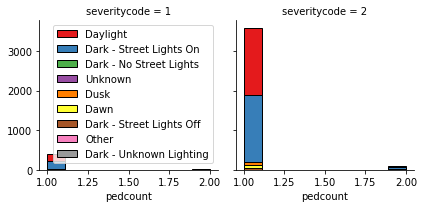

In [32]:
import seaborn as sns

bins = np.linspace(df_a.severitycode.min(), df_a.severitycode.max(), 10)
g = sns.FacetGrid(df, col="severitycode", hue="lightcond", palette="Set1", col_wrap=2)
g.map(plt.hist, 'pedcount', bins=bins, ec="k")

g.axes[0].legend()
plt.show()

In [37]:
#Replacing values to determine between day and night regardless of how it was written by the reporter
df['lightcond'] = df['lightcond'].replace(['Daylight','Dark - Street Lights On','Dark - No Street Lights','Dark - Unknown Lighting','Dark - Street Lights Off','Dusk','Dawn'],
                                          ['Day','Dark','Dark','Dark','Dark','Dark','Day'])
df_a['lightcond'].value_counts()

Day      118639
Dark      57156
Other       235
Name: lightcond, dtype: int64

In [48]:
#Dropping any unknown lighting conditions from dataset since we cannot determine the conditions for the model
df_a = df_a[df_a.lightcond.str.contains("Unknown") == False]
df_a = df_a[df_a.lightcond.str.contains("Other") == False]
df_a['lightcond'].value_counts()

Day     118639
Dark     57156
Name: lightcond, dtype: int64

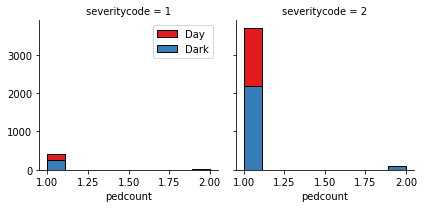

In [50]:
import seaborn as sns

bins = np.linspace(df_a.severitycode.min(), df_a.severitycode.max(), 10)
g = sns.FacetGrid(df_a, col="severitycode", hue="lightcond", palette="Set1", col_wrap=2)
g.map(plt.hist, 'pedcount', bins=bins, ec="k")

g.axes[0].legend()
plt.show()

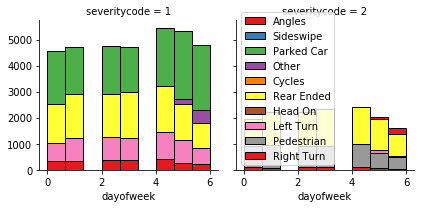

In [52]:
df_a['dayofweek'] = df_a['incdttm'].dt.dayofweek
bins = np.linspace(df_a.dayofweek.min(), df_a.dayofweek.max(), 10)
g = sns.FacetGrid(df_a, col="severitycode", hue="collisiontype", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.legend(loc='best')
plt.show()

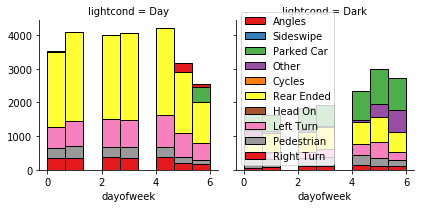

In [53]:
df_a['dayofweek'] = df_a['incdttm'].dt.dayofweek
bins = np.linspace(df_a.dayofweek.min(), df_a.dayofweek.max(), 10)
g = sns.FacetGrid(df_a, col="lightcond", hue="collisiontype", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.legend(loc='best')
plt.show()

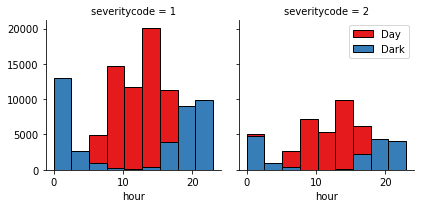

In [63]:
df_a['hour'] = df_a['incdttm'].dt.hour
bins = np.linspace(df_a.hour.min(), df_a.hour.max(), 10)
g = sns.FacetGrid(df_a, col="severitycode", hue="lightcond", palette="Set1", col_wrap=2)
g.map(plt.hist, 'hour', bins=bins, ec="k")
g.axes[-1].legend()
plt.legend(loc='best')
plt.show()

In [67]:
df_a.groupby(['lightcond'])['dayofweek'].value_counts(normalize=True)
#We can see here that if an accident occurs at night it is more likely to be on a weekend Frida, Saturday or Sunday, it is least likely to be on a Monday

lightcond  dayofweek
0          4            0.168983
           1            0.160015
           2            0.158987
           3            0.157377
           0            0.142626
           5            0.119219
           6            0.092794
1          5            0.186700
           4            0.161680
           6            0.153405
           3            0.137728
           2            0.124659
           1            0.119445
           0            0.116383
Name: dayofweek, dtype: float64

We can see here that if an accident occurs at night it is more likely to be on a weekend Frida, Saturday or Sunday, it is least likely to be on a Monday

Fridays have a high occurence of daytime and nighttime accidents but Sunday is the least dangerous day for daytime accidents which makes sense since most people stay home on Sundays and go out on weekends

In [68]:
df_a['weekend'] = df_a['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df_a.head()

,severitycode,latitude,longitude,personcount,pedcount,pedcylcount,vehcount,incdttm,addrtype,junctiontype,severitydesc,collisiontype,weather,roadcond,lightcond,dayofweek,hour,weekend
0,2,47.703140,-122.323148,2,0,0,2,2013-03-27 14:54:00,Intersection,At Intersection (intersection related),Injury Collision,Angles,Overcast,Wet,0,2,14,0
1,1,47.647172,-122.347294,2,0,0,2,2006-12-20 18:55:00,Block,Mid-Block (not related to intersection),Property Damage Only Collision,Sideswipe,Raining,Wet,1,2,18,0
2,1,47.607871,-122.334540,4,0,0,3,2004-11-18 10:20:00,Block,Mid-Block (not related to intersection),Property Damage Only Collision,Parked Car,Overcast,Dry,0,3,10,0
3,1,47.604803,-122.334803,3,0,0,3,2013-03-29 09:26:00,Block,Mid-Block (not related to intersection),Property Damage Only Collision,Other,Clear,Dry,0,4,9,1
4,2,47.545739,-122.306426,2,0,0,2,2004-01-28 08:04:00,Intersection,At Intersection (intersection related),Injury Collision,Angles,Raining,Wet,0,2,8,0


In [64]:
#Replace Day and Night by 0 and 1
df_a['lightcond'].replace(to_replace=['Day','Dark'], value=[0,1],inplace=True)
df_a.head()

,severitycode,latitude,longitude,personcount,pedcount,pedcylcount,vehcount,incdttm,addrtype,junctiontype,severitydesc,collisiontype,weather,roadcond,lightcond,dayofweek,hour
0,2,47.703140,-122.323148,2,0,0,2,2013-03-27 14:54:00,Intersection,At Intersection (intersection related),Injury Collision,Angles,Overcast,Wet,0,2,14
1,1,47.647172,-122.347294,2,0,0,2,2006-12-20 18:55:00,Block,Mid-Block (not related to intersection),Property Damage Only Collision,Sideswipe,Raining,Wet,1,2,18
2,1,47.607871,-122.334540,4,0,0,3,2004-11-18 10:20:00,Block,Mid-Block (not related to intersection),Property Damage Only Collision,Parked Car,Overcast,Dry,0,3,10
3,1,47.604803,-122.334803,3,0,0,3,2013-03-29 09:26:00,Block,Mid-Block (not related to intersection),Property Damage Only Collision,Other,Clear,Dry,0,4,9
4,2,47.545739,-122.306426,2,0,0,2,2004-01-28 08:04:00,Intersection,At Intersection (intersection related),Injury Collision,Angles,Raining,Wet,0,2,8


In [73]:
#Day is 0, Night is 1 -- Weekend is 1, Weekday is 0
df_a.groupby(['roadcond'])['weekend'].value_counts(normalize=True)

roadcond        weekend
Dry             0          0.586022
                1          0.413978
Ice             0          0.580475
                1          0.419525
Oil             0          0.603175
                1          0.396825
Other           0          0.522523
                1          0.477477
Sand/Mud/Dirt   1          0.514706
                0          0.485294
Snow/Slush      0          0.573751
                1          0.426249
Standing Water  0          0.509259
                1          0.490741
Unknown         0          0.568306
                1          0.431694
Wet             0          0.564775
                1          0.435225
Name: weekend, dtype: float64

In [89]:
df_a[['vehcount','lightcond','dayofweek']].head()

,vehcount,lightcond,dayofweek
0,2,0,2
1,2,1,2
2,3,0,3
3,3,0,4
4,2,0,2


In [91]:
#Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame
Feature = df_a[['vehcount','lightcond','dayofweek']]
Feature = pd.concat([Feature,pd.get_dummies(df_a['roadcond'])], axis=1)
Feature.drop(['Other'], axis = 1,inplace=True)
Feature = pd.concat([Feature,pd.get_dummies(df_a['weather'])], axis=1)
Feature.drop(['Other'], axis = 1,inplace=True)
Feature.drop(['Unknown'], axis = 1,inplace=True)
Feature.head()

,vehcount,lightcond,dayofweek,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing
0,2,0,2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,2,1,2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,3,0,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,3,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2,0,2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


Feature selection
Lets define feature sets, X:

In [92]:
X = Feature
X[0:5]

,vehcount,lightcond,dayofweek,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing
0,2,0,2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,2,1,2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,3,0,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,3,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2,0,2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


What are our labels?

In [93]:
y = df_a['severitycode'].values
y[0:5]

array([2, 1, 1, 1, 2])

####  Normalize Data
Data Standardization give data zero mean and unit variance (technically should be done after train test split

In [94]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.05335878, -0.69409222, -0.49123972, -1.51130617, -0.08068373,
        -0.01893411, -0.0196714 , -0.07015594, -0.02479374,  1.66168765,
        -0.01635324, -1.28273283, -0.0565306 ,  2.33356291, -0.0053332 ,
        -0.47797429, -0.01192608, -0.0250224 , -0.06879187],
       [ 0.05335878,  1.44073075, -0.49123972, -1.51130617, -0.08068373,
        -0.01893411, -0.0196714 , -0.07015594, -0.02479374,  1.66168765,
        -0.01635324, -1.28273283, -0.0565306 , -0.42852926, -0.0053332 ,
         2.09216275, -0.01192608, -0.0250224 , -0.06879187],
       [ 1.79559617, -0.69409222,  0.02987451,  0.6616793 , -0.08068373,
        -0.01893411, -0.0196714 , -0.07015594, -0.02479374, -0.60179782,
        -0.01635324, -1.28273283, -0.0565306 ,  2.33356291, -0.0053332 ,
        -0.47797429, -0.01192608, -0.0250224 , -0.06879187],
       [ 1.79559617, -0.69409222,  0.55098873,  0.6616793 , -0.08068373,
        -0.01893411, -0.0196714 , -0.07015594, -0.02479374, -0.60179782,
        -0.016

## Classification

#### KNN: 

Test set Accuracy at k= 1 :  0.5913157395756123
Test set Accuracy at k= 2 :  0.6723837760501956
Test set Accuracy at k= 3 :  0.6509403064830297
Test set Accuracy at k= 4 :  0.6751590160826022
Test set Accuracy at k= 5 :  0.6551979728681503
Test set Accuracy at k= 6 :  0.6842087118404495
Test set Accuracy at k= 7 :  0.6801234206126213
Test set Accuracy at k= 8 :  0.6874666023132746
Test set Accuracy at k= 9 :  0.6897074793580749


Text(0, 0.5, 'Testing Accuracy')

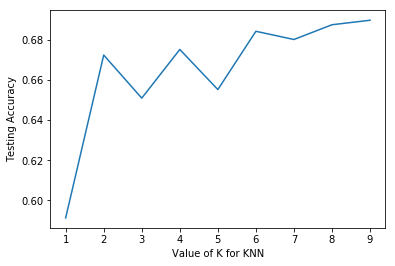

In [95]:
# finding a suitable k value
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_similarity_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42)

k_range = range(1, 10)
accuracy_score = []
for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    # perform the test
    knn_yhat = KNN.predict(X_test)
    print("Test set Accuracy at k=", k, ": ", jaccard_similarity_score(y_test, knn_yhat))
    accuracy_score.append(jaccard_similarity_score(y_test, knn_yhat))

# plot the relationship between K and testing accuracy
plt.plot(k_range, accuracy_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [96]:
# for KNN
from sklearn.neighbors import KNeighborsClassifier
# perform the test
KNN = KNeighborsClassifier(n_neighbors = 9).fit(X_train, y_train)
KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

### Decision Tree

In [99]:
# finding the best depth level
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

# Compare accuracy result for depth = 3, 4 and 5
d_range = range(3, 6)
f1 = []
ja = []
for d in d_range:
    DT = DecisionTreeClassifier(criterion="entropy", max_depth=d)
    DT.fit(X_train, y_train)
    dt_yhat = DT.predict(X_test)
    f1.append(f1_score(y_test, dt_yhat, average='weighted'))
    ja.append(jaccard_similarity_score(y_test, dt_yhat))

result = pd.DataFrame(f1, index=['d=3','d=4', 'd=5'])
result.columns = ['F1-score']
result.insert(loc=1, column='Jacard', value=ja)
result.columns.name = "Depth"
result

Depth,F1-score,Jacard
d=3,0.650625,0.698430
d=4,0.636617,0.699429
d=5,0.642695,0.700102


### SVM 

In [ ]:
# for SVM
from sklearn import svm
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt
%matplotlib inline

func_list = ['linear', 'poly', 'rbf', 'sigmoid']
accuracy_score = []

for func in func_list:
    SVM = svm.SVC(kernel=func)
    SVM.fit(X_train, y_train)
    svm_yhat = SVM.predict(X_test)
    accuracy_score.append(f1_score(y_test, svm_yhat, average='weighted'))
    
# plot the comparison among 4 kernel functions
import numpy as np
import matplotlib.pyplot as plt
y_pos = np.arange(len(func_list))
plt.bar(y_pos, accuracy_score, align='center', alpha=0.5)
plt.xticks(y_pos, func_list)
plt.ylabel('Accuracy')
plt.xlabel('Kernel Functions')
plt.title('Accuracy Comparison for 4 Kernal Functions')
plt.show()

### Logistic Regression

In [ ]:
# for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt
%matplotlib inline

c_list = [0.1, 0.01, 0.001]
solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
idx = []

accuracy_score = []
for idx1, c in enumerate(c_list):
    for idx2, sol in enumerate(solver_list):
        idx.append(idx2 + idx1 * 5)
        # perform the test
        LR = LogisticRegression(C=c, solver=sol).fit(X_train, y_train)
        # it can predict the outcome
        lr_yhat = LR.predict(X_test)
        lr_prob = LR.predict_proba(X_test)
        print("Test ", (idx2 + idx1 * 5), ": Accuracy at c =", c,"solver=", sol,
              "is : ", log_loss(y_test, lr_prob))
        accuracy_score.append(log_loss(y_test, lr_prob))
lr_prob = LR.predict_proba(X_test)
log_loss(y_test, lr_prob)
# plot the relationship between K and testing accuracy
plt.plot(idx, accuracy_score)
plt.xlabel('Parameter value')
plt.ylabel('Testing Accuracy')